In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import folium

In [11]:
df1 = pd.read_csv('311_req_2024.csv')
df2 = pd.read_csv('311_req_2023.csv')

C:\Users\ishan\AppData\Local\Temp\ipykernel_4104\1997487801.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('311_req_2023.csv')


In [12]:
df1 = df1[df1['neighborhood_services_district']=='7']
df2 = df2[df2['neighborhood_services_district']=='7']

In [16]:
df1

,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source
11,101005231734,2024-01-01 06:16:19,NaN,2024-01-01 06:40:50,ONTIME,Closed,Case Closed. Closed date : Mon Jan 01 11:40:50...,Needle Pickup,Mayor's 24 Hour Hotline,Needle Program,...,Dorchester,7,13,1303,875 Columbia Rd,2125.0,42.320610,-71.052384,0101000020E61000007D1666405AC351C091B78BBB0929...,Citizens Connect App
32,101005232087,2024-01-01 12:32:56,2024-01-03 03:30:00,2024-01-02 01:23:03,ONTIME,Closed,Case Closed. Closed date : Tue Jan 02 06:23:03...,Requests for Street Cleaning,Public Works Department,Street Cleaning,...,Dorchester,7,Ward 13,1306,10 Morrill St,2125.0,42.316150,-71.060201,0101000020E610000039266353DAC351C0DFEC70967728...,Citizens Connect App
53,101005232682,2024-01-02 05:54:00,2024-01-03 05:54:18,2024-01-02 07:32:31,ONTIME,Closed,Case Closed. Closed date : Tue Jan 02 12:32:31...,Request for Pothole Repair,Public Works Department,Highway Maintenance,...,Dorchester,7,17,1712,INTERSECTION Wilmington Ave & Milton Ave,NaN,42.279697,-71.075279,0101000020E610000047FA795FD1C451C07A89A918CD23...,Constituent Call
88,101005233144,2024-01-02 09:03:00,2024-01-19 09:03:36,2024-02-09 05:17:39,OVERDUE,Closed,Case Closed. Closed date : 2024-02-09 10:17:39...,Abandoned Vehicles,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,Dorchester,7,17,1714,INTERSECTION Old Morton St & River St,NaN,42.271944,-71.071240,0101000020E61000001F8085308FC451C0D3CAAB0ECF22...,Citizens Connect App
98,101005233284,2024-01-02 09:53:00,NaN,NaN,ONTIME,Open,,Schedule a Bulk Item Pickup,Public Works Department,Sanitation,...,Dorchester,7,Ward 16,1609,14 Franconia St,2122.0,42.285500,-71.054131,0101000020E610000062E430E076C351C0A91D8E3F8B24...,Constituent Call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235736,101005622258,2024-08-13 11:07:00,2024-08-16 11:07:04,2024-09-03 08:18:23,OVERDUE,Closed,Case Closed. Closed date : 2024-09-03 12:18:23...,Contractor Complaints,Public Works Department,Highway Maintenance,...,Dorchester,7,Ward 13,1310,98 Sydney St,2125.0,42.314930,-71.052751,0101000020E61000007F9BC34360C351C0944C429C4F28...,Constituent Call
235740,101005622276,2024-08-13 11:13:00,2025-08-13 11:13:53,2024-08-26 08:38:47,ONTIME,Closed,Case Closed. Closed date : Mon Aug 26 12:38:47...,Tree Maintenance Requests,Parks & Recreation Department,Trees,...,Dorchester,7,Ward 16,1611,11 Shenandoah St,2124.0,42.281670,-71.061361,0101000020E610000046891D55EDC351C0AF6147BF0D24...,Citizens Connect App
235752,101005622496,2024-08-13 13:49:01,2024-08-15 04:30:00,2024-08-14 02:52:07,ONTIME,Closed,Case Closed. Closed date : Wed Aug 14 06:52:07...,Empty Litter Basket,Public Works Department,Highway Maintenance,...,Dorchester,7,Ward 13,1306,1 Annapolis St,2125.0,42.317290,-71.062041,0101000020E6100000621FEA78F8C351C0E7447AF19C28...,Citizens Connect App
235768,101005617435,2024-08-10 04:51:00,2024-08-19 04:30:00,NaN,OVERDUE,Open,,Ground Maintenance: Keystone Shoreline - DCR,Parks & Recreation Department,Park Maintenance & Safety,...,Dorchester,7,16,1612,100 Hallet St,2122.0,42.280840,-71.046866,0101000020E61000007277A7DAFFC251C0508AAB93F223...,Citizens Connect App


In [14]:
df1.columns

Index(['case_enquiry_id', 'open_dt', 'sla_target_dt', 'closed_dt', 'on_time',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'submitted_photo', 'closed_photo',
       'location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_street_name', 'location_zipcode',
       'latitude', 'longitude', 'geom_4326', 'source'],
      dtype='object')

In [31]:
df1['ward'][235768]

'16'

In [32]:
columns_to_drop = ['closure_reason', 'case_title','queue','submitted_photo', 'closed_photo','fire_district', 'pwd_district','ward', 'precinct']
df1.drop(columns_to_drop,axis=1,inplace=True)

In [35]:
df1

,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,subject,reason,type,department,...,city_council_district,police_district,neighborhood,neighborhood_services_district,location_street_name,location_zipcode,latitude,longitude,geom_4326,source
11,101005231734,2024-01-01 06:16:19,NaN,2024-01-01 06:40:50,ONTIME,Closed,Mayor's 24 Hour Hotline,Needle Program,Needle Pickup,GEN_,...,3,C11,Dorchester,7,875 Columbia Rd,2125.0,42.320610,-71.052384,0101000020E61000007D1666405AC351C091B78BBB0929...,Citizens Connect App
32,101005232087,2024-01-01 12:32:56,2024-01-03 03:30:00,2024-01-02 01:23:03,ONTIME,Closed,Public Works Department,Street Cleaning,Requests for Street Cleaning,PWDx,...,3,C11,Dorchester,7,10 Morrill St,2125.0,42.316150,-71.060201,0101000020E610000039266353DAC351C0DFEC70967728...,Citizens Connect App
53,101005232682,2024-01-02 05:54:00,2024-01-03 05:54:18,2024-01-02 07:32:31,ONTIME,Closed,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx,...,4,B3,Dorchester,7,INTERSECTION Wilmington Ave & Milton Ave,NaN,42.279697,-71.075279,0101000020E610000047FA795FD1C451C07A89A918CD23...,Constituent Call
88,101005233144,2024-01-02 09:03:00,2024-01-19 09:03:36,2024-02-09 05:17:39,OVERDUE,Closed,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,BTDT,...,4,B3,Dorchester,7,INTERSECTION Old Morton St & River St,NaN,42.271944,-71.071240,0101000020E61000001F8085308FC451C0D3CAAB0ECF22...,Citizens Connect App
98,101005233284,2024-01-02 09:53:00,NaN,NaN,ONTIME,Open,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx,...,3,C11,Dorchester,7,14 Franconia St,2122.0,42.285500,-71.054131,0101000020E610000062E430E076C351C0A91D8E3F8B24...,Constituent Call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235736,101005622258,2024-08-13 11:07:00,2024-08-16 11:07:04,2024-09-03 08:18:23,OVERDUE,Closed,Public Works Department,Highway Maintenance,Contractor Complaints,INFO,...,3,C11,Dorchester,7,98 Sydney St,2125.0,42.314930,-71.052751,0101000020E61000007F9BC34360C351C0944C429C4F28...,Constituent Call
235740,101005622276,2024-08-13 11:13:00,2025-08-13 11:13:53,2024-08-26 08:38:47,ONTIME,Closed,Parks & Recreation Department,Trees,Tree Maintenance Requests,PARK,...,3,C11,Dorchester,7,11 Shenandoah St,2124.0,42.281670,-71.061361,0101000020E610000046891D55EDC351C0AF6147BF0D24...,Citizens Connect App
235752,101005622496,2024-08-13 13:49:01,2024-08-15 04:30:00,2024-08-14 02:52:07,ONTIME,Closed,Public Works Department,Highway Maintenance,Empty Litter Basket,PWDx,...,3,C11,Dorchester,7,1 Annapolis St,2125.0,42.317290,-71.062041,0101000020E6100000621FEA78F8C351C0E7447AF19C28...,Citizens Connect App
235768,101005617435,2024-08-10 04:51:00,2024-08-19 04:30:00,NaN,OVERDUE,Open,Parks & Recreation Department,Park Maintenance & Safety,Ground Maintenance,INFO,...,3,C11,Dorchester,7,100 Hallet St,2122.0,42.280840,-71.046866,0101000020E61000007277A7DAFFC251C0508AAB93F223...,Citizens Connect App


In [46]:
df1['open_dt'] = pd.to_datetime(df1['open_dt'])
df1['closed_dt'] = pd.to_datetime(df1['closed_dt'])
df1['sla_target_dt'] = pd.to_datetime(df1['sla_target_dt'])

# Breakdown of requests (completed vs. outstanding)
completed_requests = df1[df1['case_status'] == 'Closed'].shape[0]
outstanding_requests = df1[df1['case_status'] == 'Open'].shape[0]
print(f"Total completed requests in D7: {completed_requests}")
print(f"Total outstanding requests in D7: {outstanding_requests}")


Total completed requests in D7: 11080
Total outstanding requests in D7: 3357


In [48]:
df1['source'].unique()

array(['Citizens Connect App', 'Constituent Call', 'Self Service',
       'City Worker App', 'Employee Generated'], dtype=object)

In [47]:
d7_app_downloads = df1[df1['source'] == 'Citizens Connect App'].shape[0]
d7_newsletter_subscriptions = df1[df1['source'] == 'D7 Newsletter'].shape[0]

print(f"Number of D7 App downloads: {d7_app_downloads}")
print(f"Number of D7 Newsletter subscriptions: {d7_newsletter_subscriptions}")


Number of D7 App downloads: 6956
Number of D7 Newsletter subscriptions: 0


In [57]:
df_filtered = df1[['latitude', 'longitude', 'case_status', 'neighborhood']]

df_filtered = df_filtered.dropna(subset=['latitude', 'longitude'])

boston_map = folium.Map(location=[df_filtered['latitude'].mean(), df_filtered['longitude'].mean()], zoom_start=12)

def get_marker_color(status):
    if status == 'Open':
        return 'red'
    else:
        return 'green'

for idx, row in df_filtered.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=get_marker_color(row['case_status']),
        fill=True,
        fill_color=get_marker_color(row['case_status']),
        popup=f"Neighborhood: {row['neighborhood']}, Status: {row['case_status']}"
    ).add_to(boston_map)

map_filename = 'boston_case_map.html'
boston_map.save(map_filename)

In [58]:
from folium.plugins import HeatMap

df_filtered = df1[['latitude', 'longitude', 'case_status', 'neighborhood']]

df_filtered = df_filtered.dropna(subset=['latitude', 'longitude'])

boston_map = folium.Map(location=[df_filtered['latitude'].mean(), df_filtered['longitude'].mean()], zoom_start=12)

open_cases = df_filtered[df_filtered['case_status'] == 'Open']
closed_cases = df_filtered[df_filtered['case_status'] == 'Closed']

open_case_data = open_cases[['latitude', 'longitude']].values

closed_case_data = closed_cases[['latitude', 'longitude']].values

HeatMap(open_case_data, name='Open Cases Heatmap', min_opacity=0.5, radius=15, gradient={0.4: 'red', 1: 'darkred'}).add_to(boston_map)

HeatMap(closed_case_data, name='Closed Cases Heatmap', min_opacity=0.3, radius=15, gradient={0.4: 'green', 1: 'darkgreen'}).add_to(boston_map)

folium.LayerControl().add_to(boston_map)
map_filename = 'boston_case_heatmap.html'
boston_map.save(map_filename)


int64
object


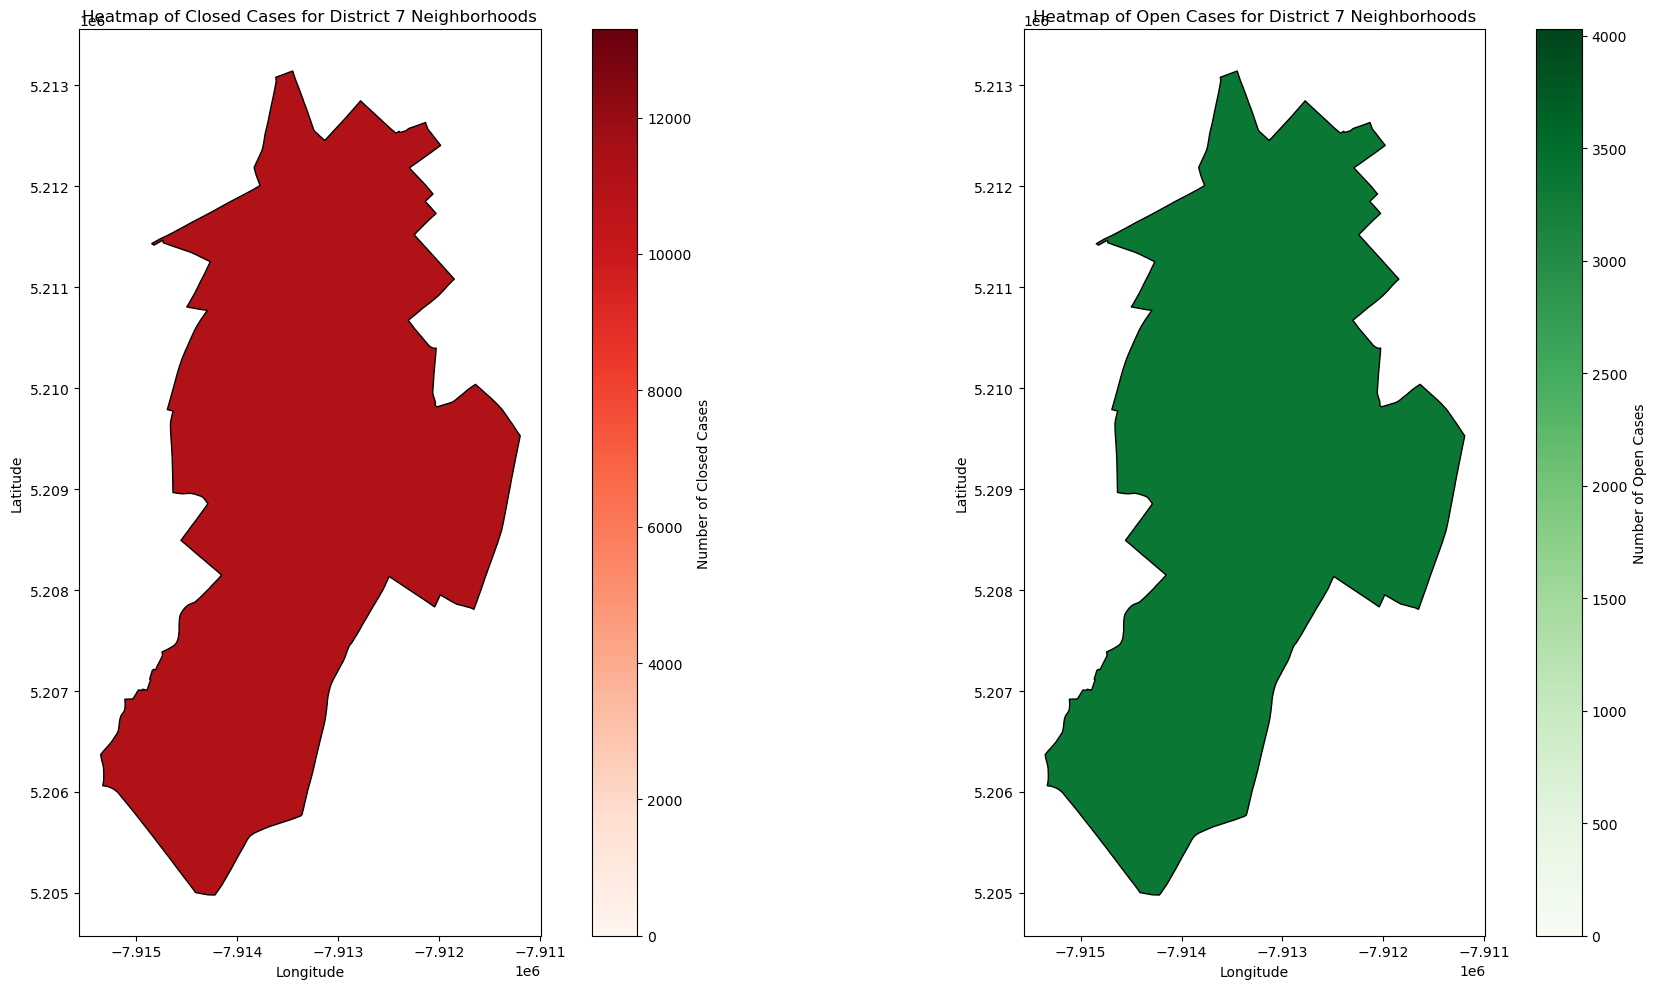

In [86]:
neighborhoods_gdf = gpd.read_file('CityCouncilDistricts_2023_5_25_1809585831812363727/CityCouncilDistricts_2024.shp')
neighborhoods_filtered = neighborhoods_gdf[neighborhoods_gdf['DISTRICT'] == 7]

# Number of cases by neighborhood_services_district and case_status
case_counts = df_filtered.groupby(['neighborhood_services_district', 'case_status']).size().unstack(fill_value=0)

print(neighborhoods_filtered['DISTRICT'].dtype)  
print(case_counts.index.dtype)

if case_counts.index.dtype == 'object':
    case_counts.index = case_counts.index.astype(int)

neighborhoods_filtered = neighborhoods_filtered.merge(case_counts, left_on='DISTRICT', right_index=True, how='left')
neighborhoods_filtered.fillna(0, inplace=True)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
closed_cases_limits = (0, neighborhoods_filtered['Closed'].max() * 1.2)  
open_cases_limits = (0, neighborhoods_filtered['Open'].max() * 1.2)  

neighborhoods_filtered.plot(column='Closed', ax=axes[0], legend=True, 
                            cmap='Reds', edgecolor='black', 
                            legend_kwds={'label': "Number of Closed Cases", 'orientation': "vertical"},
                            vmin=closed_cases_limits[0], vmax=closed_cases_limits[1])

axes[0].set_title('Heatmap of Closed Cases for District 7 Neighborhoods')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

neighborhoods_filtered.plot(column='Open', ax=axes[1], legend=True, 
                            cmap='Greens', edgecolor='black', 
                            legend_kwds={'label': "Number of Open Cases", 'orientation': "vertical"},
                            vmin=open_cases_limits[0], vmax=open_cases_limits[1])

axes[1].set_title('Heatmap of Open Cases for District 7 Neighborhoods')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

# Show the plot
plt.tight_layout()
plt.show()